# ChatGPT seaches for 01 module - [link](https://chatgpt.com/share/ddc7b1f8-4631-4437-a54e-5c52f4eb8f26)

## Content covered

1. data(prepare and load)
2. build model
3. fitting the model to the data(training)
4. making predictions and evaluating the model(inference)
5. saving and loading the model
6. putting it all together

In [ ]:
import torch
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.0+cu121'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning ia a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a staright line with *known* **parameters.**

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing data

In [ ]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data, and compare predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # Plot training data in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 16})

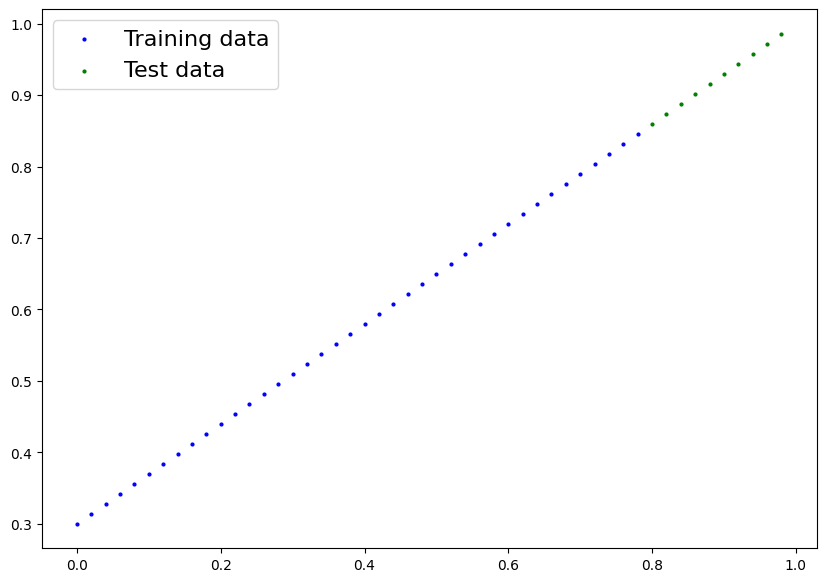

In [ ]:
plot_predictions()

## Build Model

1. OOP - [link](https://realpython.com/python3-object-oriented-programming/)

2. What our model does?
 * Starts with random values of weight and bias.
 * Look at the training data and adjust the random values to better represent/get closer to the ideal values(the weight and bias values used to create the data, 0.7 and 0.3 respectively)

 3. How does it do so?
  
  Through two main algorithm:
    * Gradient Descent
    * Backpropagation  

In [ ]:
from torch import nn # nn contains all of PyTorch's building blocks for NN

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Initialize the model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # NOTE: If you are using nn.Module it is necessary to override the `forward` method to define what should happen in forward propagation of the model
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the parameter
    return self.weights * x + self.bias # This is the linear regression formula


## PyTorch model building essentials

* **torch.nn** - contains all of the building blocks for **computational graphs**, also called as **neural network**.
* **torch.nn.Parameter** - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* **torch.nn.Module** - The base class for all neural networks module, **if you subclass it, overwrite the forward method**.
* **torch.optim**  - this is where the optimizers in pytorch lives, they will help with gradient descent
* **def forward()** - All nn.Module subclasses require you to overwrite forward(), this method defines what will happen in the forward computation.

## Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, its going to run it through the `forward()` method.

We can use no_grad() also instead of inference_mode(), but inference_mode() is preferred -> [Reason](https://x.com/pytorch/status/1437838231505096708?lang=en)

In [ ]:
# Make prediction with model
with torch.inference_mode(): # <- `torch.inference_mode()` is a context manager which is used to simply specify that the gradient now does not need to taken a track of(as previously we used requires_grad=True)
  y_preds = model_0(X_test)


# We can use no_grad() also instead of inference_mode(), but inference_mode() is prefrred
# Reason: https://x.com/pytorch/status/1437838231505096708?lang=en
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# We can do directly also(without torch.inference_mode()), but it will be a problem for memory as a lot of gradients will be tracked... which we don't need in test data, for making predictions

# y_preds = model_0(X_test)
# y_preds

# Output:
# tensor([.......], grad_fn=<AddBackward0>)

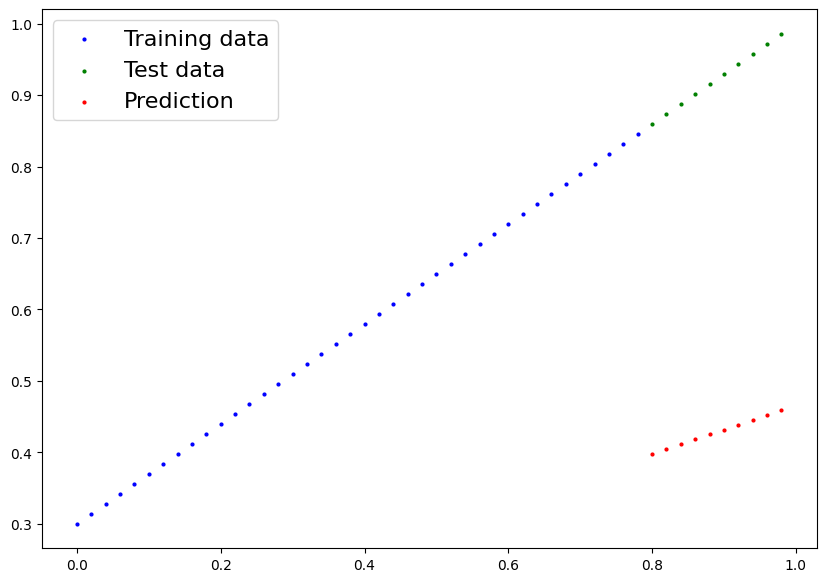

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how wrong or how poor your model's prediction are, is to use **loss function.**

**NOTE:** Loss function is also called as a cost function, which is also called as a criterion.

# Things we need to train:

* **Loss Fcuntion:** A loss function is used to measure how wrong our model's is prediction to the ideal outputs, lower is better.  
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g., weight and bais) in our case to improve the loss function.
  * Inside the optimizer, you will have to set 2 parameters:
    * `params` - the model parameters you would like to optimize, for example `params=model_0.parameters()`
    * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch we need:
* training loop
* testing loop.

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out the model's parameters (a parameter is a value that the model sets itself and hypermeter is a value that we set ourselves such as in the learning rate)

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) #lr = learning rate = possibly the most important hyperparameter you can set

**Q.** Which loss function and optimizer should I use?

**A.** This will be problem specific. But with experience, you will get an idea of what works and what does not with your particular problem set.

For example, a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you will likely want to use a loss function of `nn.BCELoss()`(binary cross entropy loss).

### Buliding a training loop and a testing loop in PyTorch

Steps:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our models' `forward()` function) - also called as forward propagation.
2.Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad - In training a neural network, the optimizer updates the model's parameters (weights) based on the gradients computed during backpropagation. However, by default, PyTorch accumulates these gradients each time backward() is called. This means that if we don’t reset (or "zero out") the gradients, the updates from previous iterations will be added to the current ones, leading to incorrect updates.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backward propagation**)
5. Optimizer step - use the optimizer to adjust our model;s parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data... (it is a hyperparameter since we have set it ourselves)
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # it is a train mode in PyTorch where it sets all parameters that requires gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad() # by default how the optimizer changes will accumulate through the loop so.. we have to 0 them above in step 3 for the next iteration of the loop

  # 4. Perform backpropagation on  the loss wrt the parameters of the model
  loss.backward()

  # 5. Set the optimizer (perform gradient descent)
  optimizer.step() # update the model parameters using the optimizer

  ### Testing
  model_0.eval() # turns off the different settings of the model not needed for evaluation/testing (dropout/batch norm layers)

  # with torch.no_grad(): # older version used no_grad, now we use inference_mode()
  with torch.inference_mode(): # turns off the gradient tracking and a coule of more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

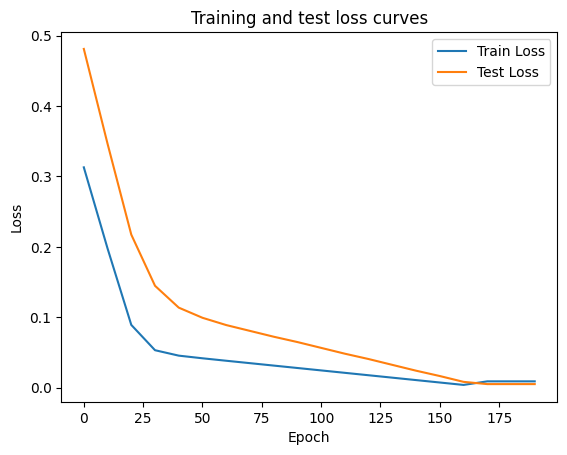

In [ ]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

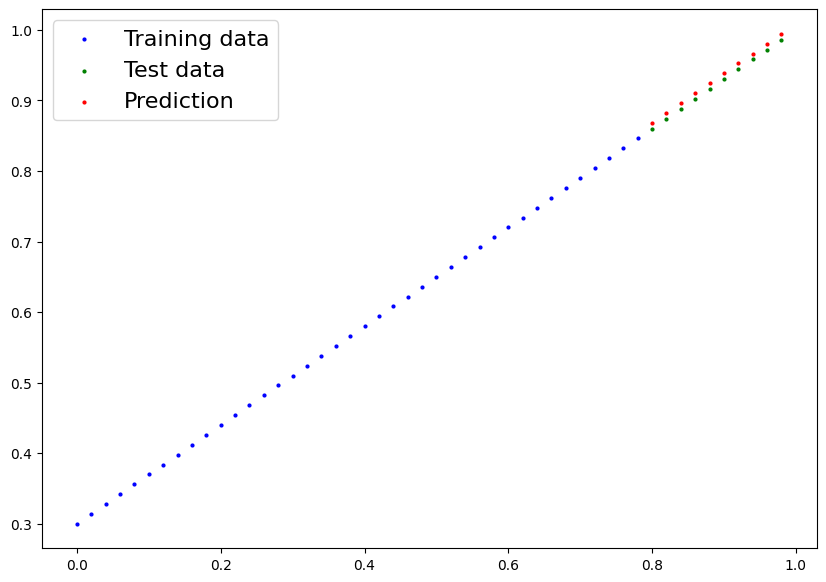

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)


In [ ]:
print(f'Actual weights and bias: {weight} and {bias}')
print(f' weights and bias: {model_0.state_dict()}')

Actual weights and bias: 0.7 and 0.3
 weights and bias: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch:

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
*Python's **pickle module** is used for serializing and deserializing Python objects, which means converting Python objects into a byte stream (serialization) and converting byte streams back into Python objects (deserialization).*

2. `torch.load()` - allows you load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving a PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1680 Aug 29 09:04 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we created our model's `state_dict()`
rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-24-c490b1a572e0>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
loaded_model_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])